In [1]:
import os
import glob
import torch.utils.data as td
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch

project_dir=os.path.expanduser('~/git/torchseg')
os.chdir(project_dir)

from dataset.fbms_dataset import fbms_dataset
from dataset.cdnet_dataset import cdnet_dataset
from dataset.dataset_generalize import image_normalizations
from utils.augmentor import Augmentations
from utils.torch_tools import get_ckpt_path,load_ckpt
from utils.disc_tools import show_images,show_tensor_list
import argparse
from models.motionseg.motion_utils import get_parser,get_default_config,get_dataset
from utils.notebook import get_model_and_dataset
from utils.config import load_config

use none layer******************************
train dataset size 353
val dataset size 367
val_path dataset size 367
no checkpoint file given, auto find /home/yzbx/tmp/logs/motion/motion_filter_flow/FBMS/task158/2019-04-28___12-53-30/model-last-30.pkl
{'always_merge_flow': False, 'app': 'train', 'aux_backbone': 'MobileNetV2', 'aux_freeze': 3, 'aux_panet': False, 'backbone_freeze': False, 'backbone_name': 'resnet50', 'backbone_pretrained': True, 'batch_size': 4, 'dataset': 'FBMS', 'decode_main_layer': 1, 'deconv_layer': 5, 'epoch': 30, 'filter_feature': 'all', 'filter_type': 'main', 'flow_backbone': 'vgg11', 'frame_gap': 5, 'freeze_layer': 3, 'freeze_ratio': 0.0, 'fusion_type': 'last', 'ignore_outOfRoi': True, 'init_lr': 0.0001, 'input_shape': [224, 224], 'layer_preference': 'last', 'log_dir': '/home/yzbx/tmp/logs/motion', 'main_panet': False, 'merge_type': 'concat', 'min_channel_number': 0, 'modify_resnet_head': False, 'motion_loss_weight': 1.0, 'net_name': 'motion_filter_flow', 'norm_st

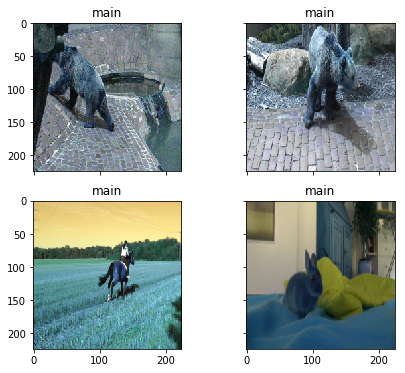

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1 -0.020837085 0.49146017 0.9373844 -1.0


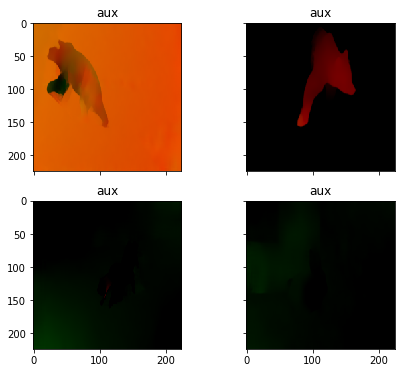

0 0.09300761320153061 0.29044310473496365 1 0


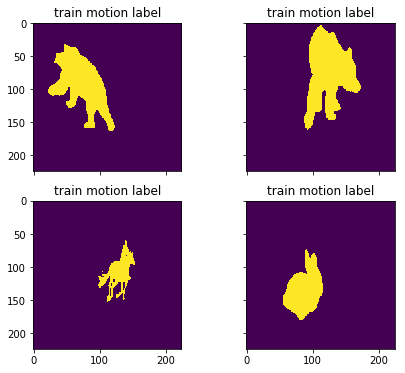

0 0.09466677295918367 0.2927541204777109 1 0


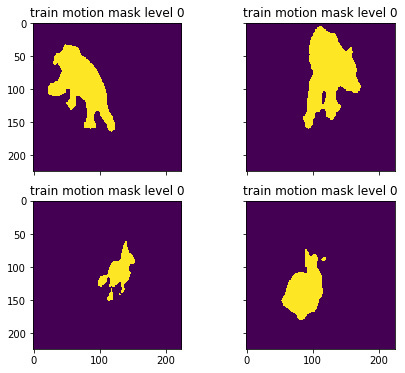

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f32794f7ef0>>
Traceback (most recent call last):
  File "/home/yzbx/bin/miniconda3/envs/new/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/yzbx/bin/miniconda3/envs/new/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/yzbx/bin/miniconda3/envs/new/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/yzbx/bin/miniconda3/envs/new/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/yzbx/bin/miniconda3/envs/new/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/yzbx/bin/minicond

0 -0.34443113 0.44345388 0.8039216 -1.0


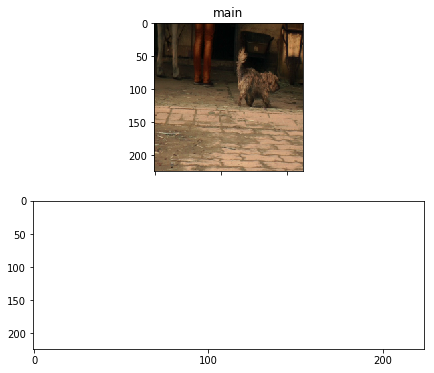

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1 0.47833326 0.49364075 1.0 -0.39106765


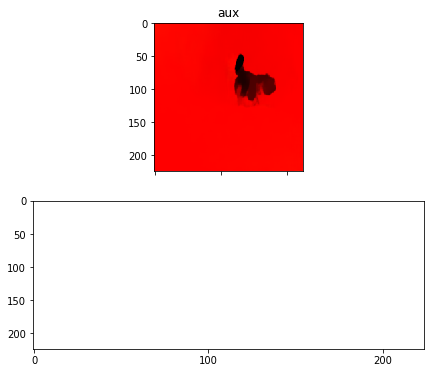

0 0.06265833333333333 0.24234740889314713 1 0


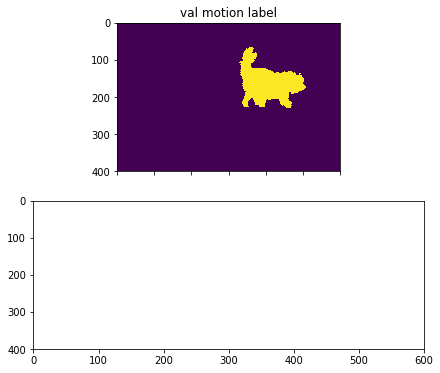

0 0.07806521045918367 0.2682741757515006 1 0


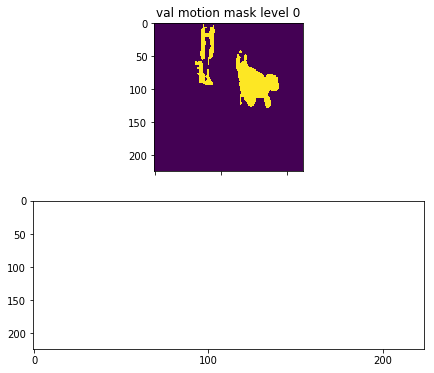

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f329d618860>>
Traceback (most recent call last):
  File "/home/yzbx/bin/miniconda3/envs/new/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/yzbx/bin/miniconda3/envs/new/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/yzbx/bin/miniconda3/envs/new/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/yzbx/bin/miniconda3/envs/new/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/yzbx/bin/miniconda3/envs/new/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/yzbx/bin/minicond

In [22]:
# config_list='--net_name motion_unet --backbone_name vgg11'
# config_list+=' --upsample_layer 1 --freeze_layer 0 --deconv_layer 5 --use_none_layer False'
# config_list+=' --use_part_number 1000 --note task015_fg5 --dataset BMCnet'
# model,dataset_loaders,normer=get_model_and_dataset(config_list.split())
# config_list='/home/yzbx/tmp/logs/motion/motion_panet2/FBMS/task103/2019-04-12___21-20-46/config.txt'
# config_file='/home/yzbx/tmp/logs/motion/motion_filter/FBMS/task168_resnet50/2019-04-28___22-48-53/config.txt'
config_file='/home/yzbx/tmp/logs/motion/motion_filter_flow/FBMS/task158/2019-04-28___12-53-30/config.txt'
config_list=load_config(config_file)
config_list.filter_relu=False
# config_list.filter_feature=None
model,dataset_loaders,normer=get_model_and_dataset(config_list)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.eval()

print(model.config)
for split in ['train','val']:
    for frames,gt in dataset_loaders[split]:
        images = [torch.autograd.Variable(img.to(device).float()) for img in frames]
        labels=torch.autograd.Variable(gt.to(device).long())
        outputs=model.forward(images)
        
        show_tensor_list(images,['main','aux'],normer)
        show_tensor_list([gt],[split+' motion label'])
        masks=[torch.argmax(x,dim=1,keepdim=True) for x in outputs['masks']]
        show_tensor_list(masks,[split+' motion mask level '+str(idx) for idx,t in enumerate(outputs['masks'])])
        
        break

torch.Size([1, 1, 7, 7])


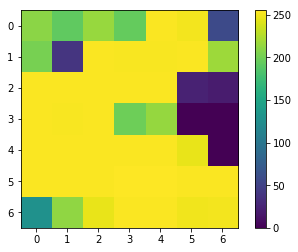

255 0
[[211 193 216 195 254 251  57]
 [203  39 254 253 253 254 218]
 [254 254 254 254 254  24  19]
 [254 253 254 199 215   0   0]
 [254 254 254 254 254 247   0]
 [254 254 254 255 255 254 254]
 [129 213 247 254 254 250 251]]
torch.Size([1, 1, 400, 600])


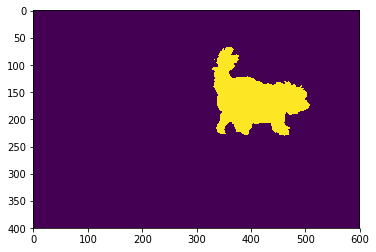

In [23]:
print(model.midnet.attention.shape)
img=np.squeeze(model.midnet.attention.data.cpu().numpy())
img=(img*255).astype(np.uint8)
plt.imshow(img)
plt.colorbar()
plt.show()
print(np.max(img),np.min(img))
print(img)
print(gt.shape)
gt_img=np.squeeze(gt.data.cpu().numpy())
plt.imshow(gt_img)
plt.show()

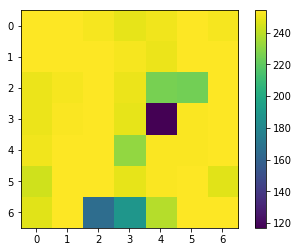

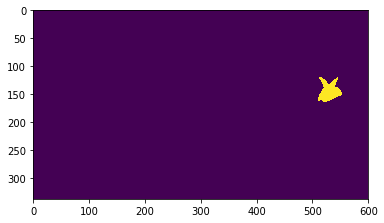

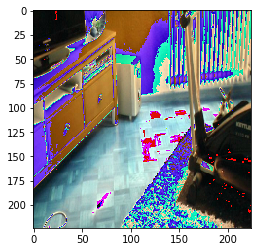

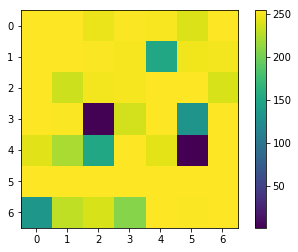

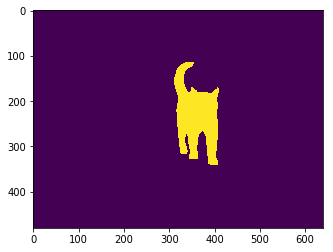

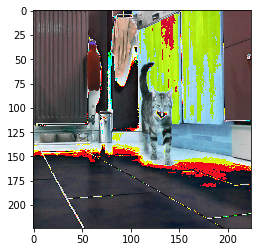

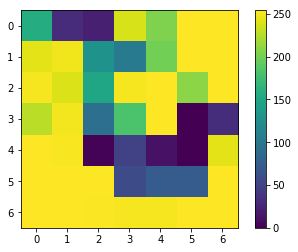

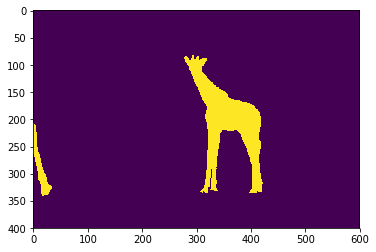

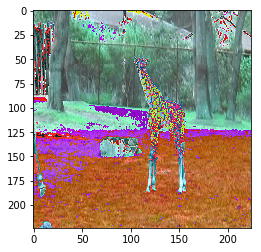

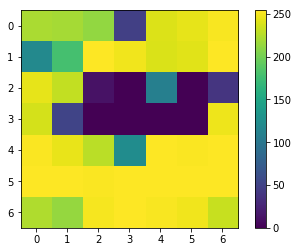

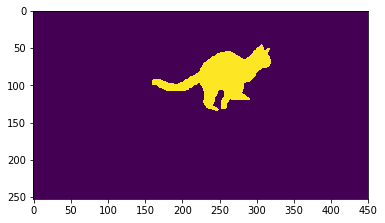

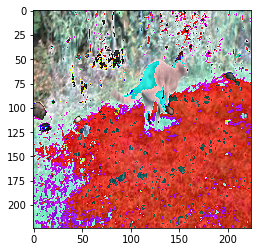

In [30]:
def show_attention(model,gt,images):
    img=np.squeeze(model.midnet.attention.data.cpu().numpy())
    img=(img*255).astype(np.uint8)
    plt.imshow(img)
    plt.colorbar()
    plt.show()
    gt_img=np.squeeze(gt.data.cpu().numpy())
#     gt_img=cv2.resize(gt_img,(7,7))
    plt.imshow(gt_img)
    plt.show()
    
    in_img=np.transpose(np.squeeze(images[0].data.cpu().numpy()),(1,2,0))
    in_img=((in_img+2)*255).astype(np.uint8)
    plt.imshow(in_img)
    plt.show()

idx=0
for split in ['val']:
    for frames,gt in dataset_loaders[split]:
        images = [torch.autograd.Variable(img.to(device).float()) for img in frames]
        labels=torch.autograd.Variable(gt.to(device).long())
        outputs=model.forward(images)
        
        show_attention(model,gt,images)
        idx+=1
        if idx>3:
            break